## Is there a trend between unemployment rates and violent crimes in NYC?

### Data Sources: https://www.kaggle.com/jayrav13/unemployment-by-county-us, https://data.ny.gov/Public-Safety/Index-Crimes-by-County-and-Agency-Beginning-1990/ca8h-8gjq


In [211]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
from IPython.display import display, HTML

In [212]:
UNEMPLOYMENT_PATH = "county-unemployment.csv"
CRIMES_PATH = "county-crimes.csv"
unem_df = pd.read_csv(UNEMPLOYMENT_PATH)
crimes_df = pd.read_csv(CRIMES_PATH)

### A peek at the unemployment data:

In [213]:
unem_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 885548 entries, 0 to 885547
Data columns (total 5 columns):
Year      885548 non-null int64
Month     885548 non-null object
State     885548 non-null object
County    885548 non-null object
Rate      885548 non-null float64
dtypes: float64(1), int64(1), object(3)
memory usage: 33.8+ MB


In [214]:
unem_df.head()

,Year,Month,State,County,Rate
0,2015,February,Mississippi,Newton County,6.1
1,2015,February,Mississippi,Panola County,9.4
2,2015,February,Mississippi,Monroe County,7.9
3,2015,February,Mississippi,Hinds County,6.1
4,2015,February,Mississippi,Kemper County,10.6


In [215]:
unem_df.columns

Index(['Year', 'Month', 'State', 'County', 'Rate'], dtype='object')

### Change the dataframe so that we can sort by Month chronologically, rather than alphabetically:

In [216]:
months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
unem_df['Month'] = pd.Categorical(unem_df['Month'], categories=months, ordered=True)

### Remove all counties except for those in NYC:

In [217]:
boroughs = ['Queens County', 'Richmond County', 'Kings County', 'New York County', 'Bronx County']
unem_df = unem_df[(unem_df.State == 'New York') & unem_df.County.isin(boroughs)]
unem_df = unem_df.sort_values(by=['Year','Month'])   # unem_df.loc[unem_df.Year==2016]

### Change borough names:

In [218]:
unem_df.County.loc[unem_df.County == 'Queens County'] = 'Queens'
unem_df.County.loc[unem_df.County == 'Richmond County'] = 'Staten Island'
unem_df.County.loc[unem_df.County == 'Kings County'] = 'Brooklyn'
unem_df.County.loc[unem_df.County == 'New York County'] = 'Manhattan'
unem_df.County.loc[unem_df.County == 'Bronx County'] = 'Bronx'
unem_df.head(10)

C:\Users\Tora\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,Year,Month,State,County,Rate
286695,1990,January,New York,Bronx,8.4
286698,1990,January,New York,Brooklyn,8.3
286699,1990,January,New York,Manhattan,6.6
286718,1990,January,New York,Staten Island,5.9
286722,1990,January,New York,Queens,6.2
272838,1990,February,New York,Bronx,8.7
272841,1990,February,New York,Brooklyn,8.3
272842,1990,February,New York,Manhattan,6.2
272861,1990,February,New York,Staten Island,6.0
272865,1990,February,New York,Queens,6.2


### Check for missing values:

In [219]:
unem_df.isnull().sum()

Year      0
Month     0
State     0
County    0
Rate      0
dtype: int64

### Rename the rate column to 'Unemployment Rate':

In [220]:
unem_df.rename(columns={'Rate': 'Unemployment Rate'}, inplace=True)

In [221]:
unem_df.head()

,Year,Month,State,County,Unemployment Rate
286695,1990,January,New York,Bronx,8.4
286698,1990,January,New York,Brooklyn,8.3
286699,1990,January,New York,Manhattan,6.6
286718,1990,January,New York,Staten Island,5.9
286722,1990,January,New York,Queens,6.2


### Now let's see how the unemployment rate changes from Jan 2016-Dec 2016 for each borough:

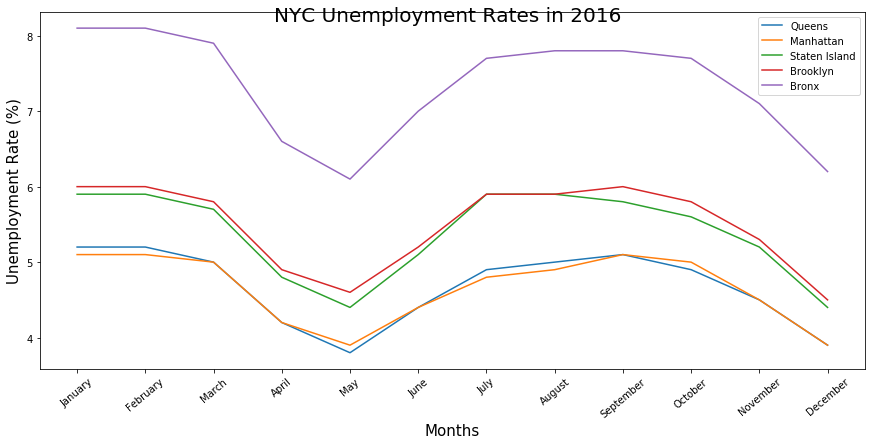

In [222]:
fig = plt.figure(figsize=(12,6))
plt.plot(months, unem_df['Unemployment Rate'].loc[(unem_df.Year==2016) & (unem_df.County=='Queens')], label = "Queens")
plt.plot(months, unem_df['Unemployment Rate'].loc[(unem_df.Year==2016) & (unem_df.County=='Manhattan')], label = "Manhattan")
plt.plot(months, unem_df['Unemployment Rate'].loc[(unem_df.Year==2016) & (unem_df.County=='Staten Island')], label = "Staten Island")
plt.plot(months, unem_df['Unemployment Rate'].loc[(unem_df.Year==2016) & (unem_df.County=='Brooklyn')], label = "Brooklyn")
plt.plot(months, unem_df['Unemployment Rate'].loc[(unem_df.Year==2016) & (unem_df.County=='Bronx')], label = "Bronx")
plt.xticks(rotation=40)
plt.tight_layout()
plt.legend()
fig.suptitle('NYC Unemployment Rates in 2016', fontsize=20)
plt.xlabel('Months', fontsize=15)
plt.ylabel('Unemployment Rate (%)', fontsize=15)
plt.show()

### And in 1990:

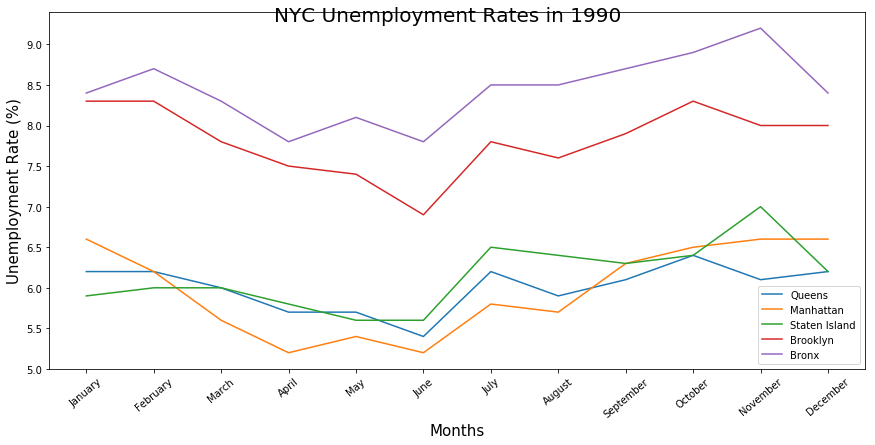

In [223]:
fig = plt.figure(figsize=(12,6))
plt.plot(months, unem_df['Unemployment Rate'].loc[(unem_df.Year==1990) & (unem_df.County=='Queens')], label = "Queens")
plt.plot(months, unem_df['Unemployment Rate'].loc[(unem_df.Year==1990) & (unem_df.County=='Manhattan')], label = "Manhattan")
plt.plot(months, unem_df['Unemployment Rate'].loc[(unem_df.Year==1990) & (unem_df.County=='Staten Island')], label = "Staten Island")
plt.plot(months, unem_df['Unemployment Rate'].loc[(unem_df.Year==1990) & (unem_df.County=='Brooklyn')], label = "Brooklyn")
plt.plot(months, unem_df['Unemployment Rate'].loc[(unem_df.Year==1990) & (unem_df.County=='Bronx')], label = "Bronx")
plt.xticks(rotation=40)
plt.tight_layout()
plt.legend()
fig.suptitle('NYC Unemployment Rates in 1990', fontsize=20)
plt.xlabel('Months', fontsize=15)
plt.ylabel('Unemployment Rate (%)', fontsize=15)
plt.show()

### It appears that the unemployement rate in Brooklyn was higher in 1990 than in 2016. And in 2016, the rates in all boroughs dipped in May.

### How does the crimes dataset look?

In [224]:
crimes_df.head()

,County,Agency,Year,Months Reported,Index Total,Violent Total,Murder,Rape,Robbery,Aggravated Assault,Property Total,Burglary,Larceny,Motor Vehicle Theft,Region
0,Albany,Albany City PD,2020,12.0,"3,532",869,16,61,161,631,"2,663",426,"1,952",285,Non-New York City
1,Albany,Albany County Park PD,2020,12.0,2,0,0,0,0,0,2,0,2,0,Non-New York City
2,Albany,Albany County Sheriff,2020,12.0,127,12,0,4,0,8,115,11,96,8,Non-New York City
3,Albany,Albany County State Police,2020,12.0,103,26,0,18,2,6,77,4,71,2,Non-New York City
4,Albany,Altamont Vg PD,2020,12.0,6,2,0,0,0,2,4,0,4,0,Non-New York City


### We can see that it includes NY counties other than the 5 boroughs. Remove the other counties and the Agency and Region columns:

In [225]:
crimes_df = crimes_df.loc[crimes_df.Region != 'Non-New York City']
crimes_df.drop(['Agency','Months Reported','Region'], axis=1, inplace=True)
crimes_df.head()

,County,Year,Index Total,Violent Total,Murder,Rape,Robbery,Aggravated Assault,Property Total,Burglary,Larceny,Motor Vehicle Theft
26,Bronx,2020,"36,217","13,129",111,523,"3,519","8,976","23,088","2,230","18,728","2,130"
211,Kings,2020,"50,938","14,590",175,701,"3,816","9,898","36,348","4,099","29,306","2,943"
279,New York,2020,"47,676","9,264",84,430,"3,053","5,697","38,412","4,449","32,568","1,395"
397,Queens,2020,"37,446","9,629",78,515,"2,549","6,487","27,817","2,842","22,431","2,544"
410,Richmond,2020,"5,042","1,347",20,84,245,998,"3,695",286,"3,163",246


### Change borough names:

In [226]:
crimes_df.County.loc[crimes_df.County == 'Richmond'] = 'Staten Island'
crimes_df.County.loc[crimes_df.County == 'Kings'] = 'Brooklyn'
crimes_df.County.loc[crimes_df.County == 'New York'] = 'Manhattan'
crimes_df.County.loc[crimes_df.County == 'Bronx County'] = 'Bronx'
crimes_df.head(10)

,County,Year,Index Total,Violent Total,Murder,Rape,Robbery,Aggravated Assault,Property Total,Burglary,Larceny,Motor Vehicle Theft
26,Bronx,2020,"36,217","13,129",111,523,"3,519","8,976","23,088","2,230","18,728","2,130"
211,Brooklyn,2020,"50,938","14,590",175,701,"3,816","9,898","36,348","4,099","29,306","2,943"
279,Manhattan,2020,"47,676","9,264",84,430,"3,053","5,697","38,412","4,449","32,568","1,395"
397,Queens,2020,"37,446","9,629",78,515,"2,549","6,487","27,817","2,842","22,431","2,544"
410,Staten Island,2020,"5,042","1,347",20,84,245,998,"3,695",286,"3,163",246
651,Bronx,2019,"35,255","13,157",84,645,"3,530","8,898","22,098","1,750","19,081","1,267"
835,Brooklyn,2019,"47,735","14,194",100,842,"4,031","9,221","33,541","3,203","28,505","1,833"
905,Manhattan,2019,"49,858","9,779",52,527,"3,115","6,085","40,079","2,333","37,064",682
1030,Queens,2019,"32,483","9,393",69,643,"2,493","6,188","23,090","2,298","19,231","1,561"
1043,Staten Island,2019,"4,789","1,298",14,113,227,944,"3,491",262,"3,050",179


###  Remove the commas from the numbers:

In [227]:
def remove_comma(number):
    return number.replace(",","")

columns = ['Index Total','Violent Total','Murder','Rape','Robbery','Aggravated Assault',
           'Property Total','Burglary','Larceny','Motor Vehicle Theft']
for col in columns:
    nums = crimes_df[col].tolist()
    nums = map(remove_comma, nums)
    series = pd.Series(list(nums))
    series.astype('int64')
    crimes_df[col] = series.values


In [228]:
crimes_df

,County,Year,Index Total,Violent Total,Murder,Rape,Robbery,Aggravated Assault,Property Total,Burglary,Larceny,Motor Vehicle Theft
26,Bronx,2020,36217,13129,111,523,3519,8976,23088,2230,18728,2130
211,Brooklyn,2020,50938,14590,175,701,3816,9898,36348,4099,29306,2943
279,Manhattan,2020,47676,9264,84,430,3053,5697,38412,4449,32568,1395
397,Queens,2020,37446,9629,78,515,2549,6487,27817,2842,22431,2544
410,Staten Island,2020,5042,1347,20,84,245,998,3695,286,3163,246
651,Bronx,2019,35255,13157,84,645,3530,8898,22098,1750,19081,1267
835,Brooklyn,2019,47735,14194,100,842,4031,9221,33541,3203,28505,1833
905,Manhattan,2019,49858,9779,52,527,3115,6085,40079,2333,37064,682
1030,Queens,2019,32483,9393,69,643,2493,6188,23090,2298,19231,1561
1043,Staten Island,2019,4789,1298,14,113,227,944,3491,262,3050,179


In [272]:
boroughs = ['Queens', 'Staten Island', 'Brooklyn', 'Bronx', 'Manhattan']
years = [2014,2015,2016]
avg_employment_rates = []
for b in boroughs:
    rates = []
    for y in years:
        avg = unem_df['Unemployment Rate'].loc[(unem_df['County'] == b) & (unem_df['Year']==y)].mean()
        rates.append(avg)
    avg_employment_rates.append(rates)

### Preparing the data for graphing the violent crime:

In [273]:
violent_crime_totals = []
for b in boroughs:
    totals = []
    for y in years:
        series_value =crimes_df.loc[(crimes_df['County'] == b) & (crimes_df['Year']==y)]['Violent Total']
        # we have to convert the series value into a list (of strings), then to just 1 string, then into an int.
        total=int(series_value.tolist()[0])
        print(b,y, total)
        totals.append(total)
    violent_crime_totals.append(totals)

Queens 2014 9800
Queens 2015 9854
Queens 2016 9356
Staten Island 2014 1551
Staten Island 2015 1651
Staten Island 2016 1589
Brooklyn 2014 17053
Brooklyn 2015 16385
Brooklyn 2016 15523
Bronx 2014 12713
Bronx 2015 13409
Bronx 2016 13817
Manhattan 2014 8327
Manhattan 2015 8789
Manhattan 2016 8839


### The violent crime totals in each borough from 2014 to 2016:

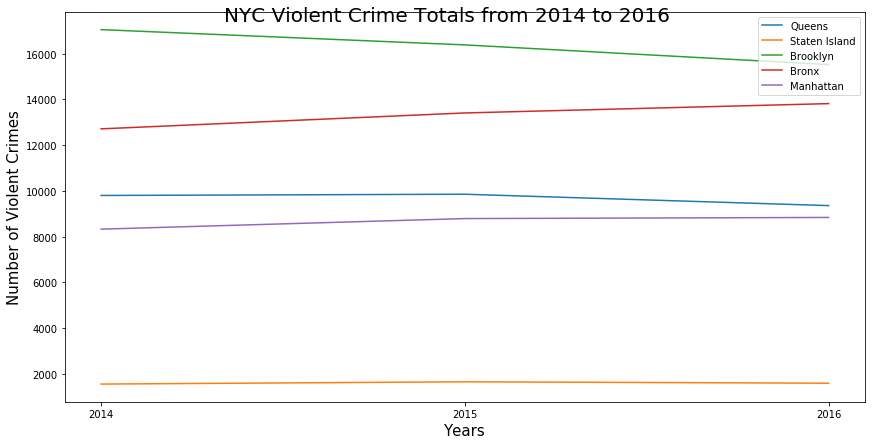

In [271]:
fig = plt.figure(figsize=(12,6))
plt.plot(['2014','2015','2016'], violent_crime_totals[0], label = "Queens")
plt.plot(['2014','2015','2016'], violent_crime_totals[1], label = "Staten Island")
plt.plot(['2014','2015','2016'], violent_crime_totals[2], label = "Brooklyn")
plt.plot(['2014','2015','2016'], violent_crime_totals[3], label = "Bronx")
plt.plot(['2014','2015','2016'], violent_crime_totals[4], label = "Manhattan")
plt.tight_layout()
plt.legend()
fig.suptitle('NYC Violent Crime Totals from 2014 to 2016', fontsize=20)
plt.xlabel('Years', fontsize=15)
plt.ylabel('Number of Violent Crimes', fontsize=15)
start, end = ax.get_xlim()
ax.xaxis.set_ticks([start, end, 1])
plt.show()

### We might expect there to be a negative relationship between the unemployment rate and the violent crime totals. Although the unemployment rate dipped in 2015, the violent crime total in the Bronx increased, which does not support the hypothesis. On the other hand, in both Brooklyn and Queens, the overall violent crime decreased after 2015. The violent crime totals in Manhattan and Staten Island appear to be mostly unaffected by the lower unemployment rate.